In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
meta_fetch, hyper_fetch = load_result_logs(f"../experiments/fetch/eval_scaling")
meta_fmnist, hyper_fmnist = load_result_logs(f"../experiments/fmnist_classify/eval_scaling")
meta_add, hyper_add = load_result_logs(f"../experiments/addition/eval_scaling")

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


# Scaling Performance

In [3]:
def get_perf(hyper_log):
    popsizes = hyper_log.popsize.unique()
    try:
        model_key = "model_config/num_hidden_units"
        model_sizes = hyper_log[model_key].unique()
    except:
        model_key = "model_config/num_hidden_layers"
        model_sizes = hyper_log[model_key].unique()

    out = {}    
    for m_size in model_sizes:
        out[m_size] = []
        for p_size in popsizes:
            temp = hyper_log[hyper_log[model_key] == m_size]
            perf = temp[temp.popsize == p_size].test_eval_perf.iloc[0]
            out[m_size].append(perf)
    return out
        

In [6]:
scaling_fetch = get_perf(hyper_fetch)
scaling_fmnist = get_perf(hyper_fmnist)
scaling_addition = get_perf(hyper_add)

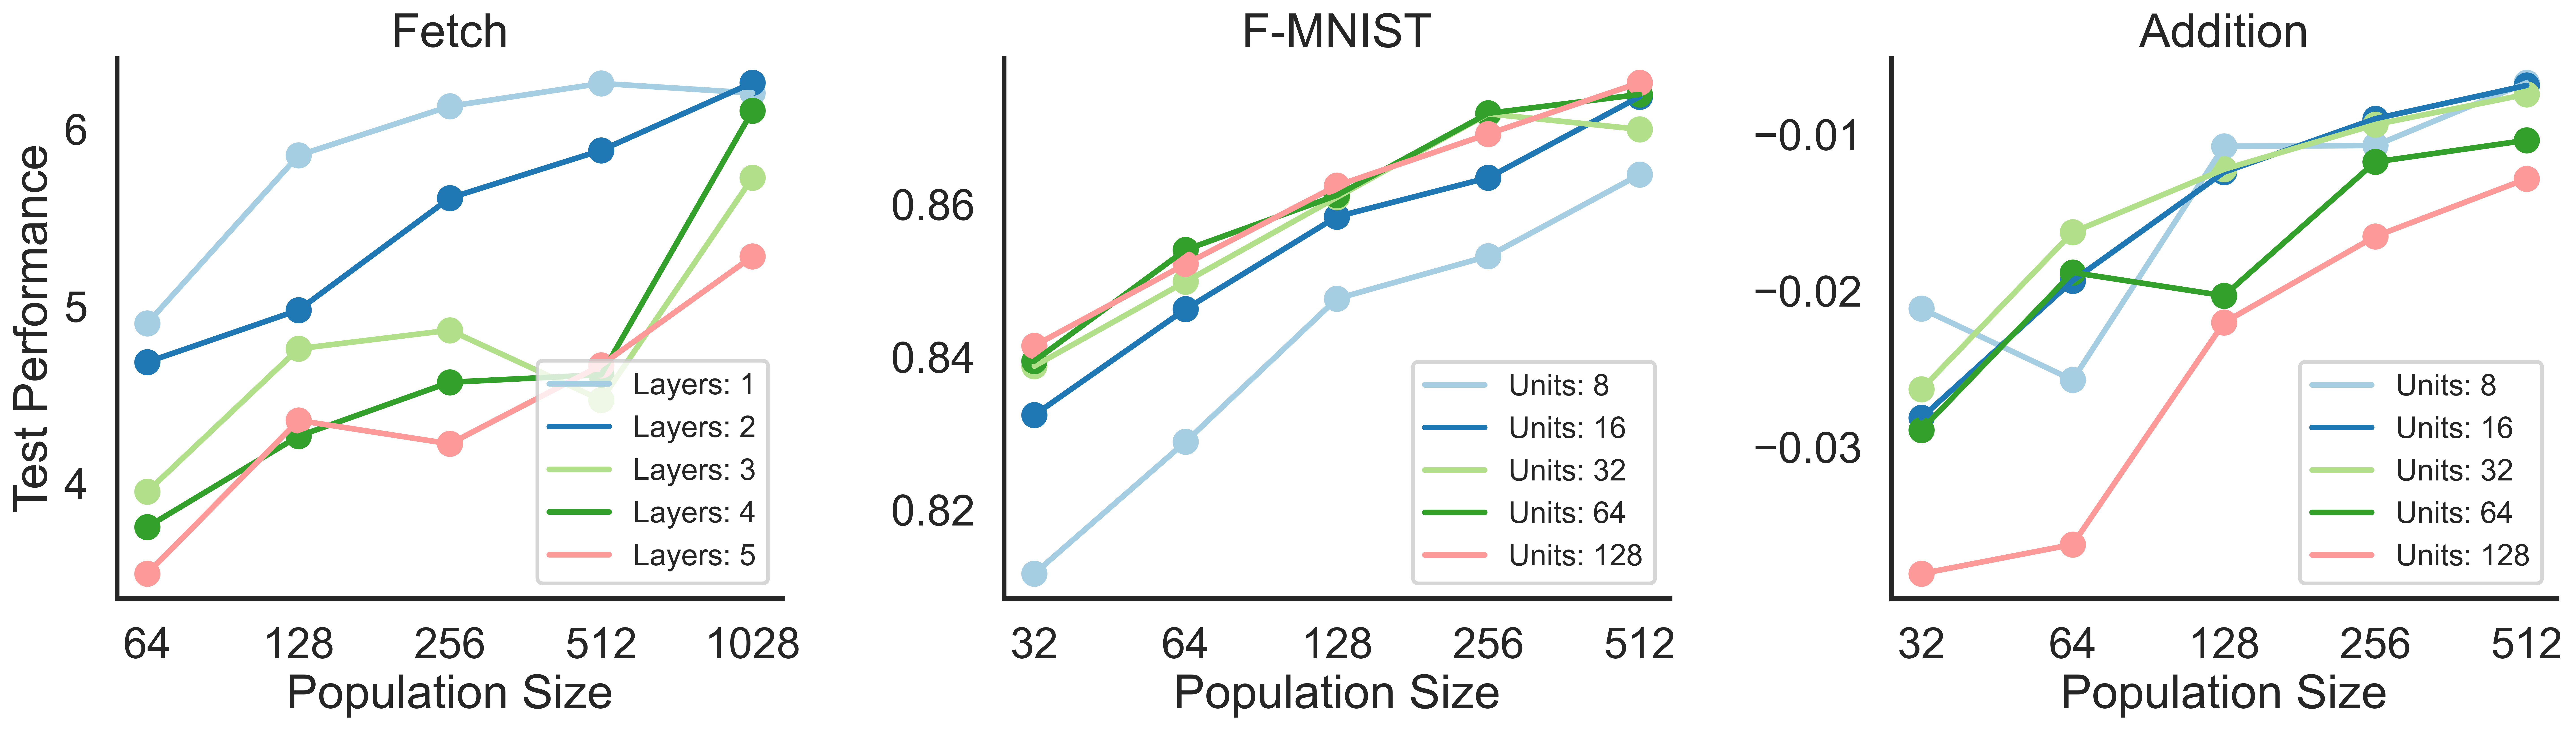

In [7]:
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

for k in scaling_fetch.keys():
    axs[0].plot(scaling_fetch[k], label=f"Layers: {k}")
    axs[0].scatter(np.arange(5), scaling_fetch[k])
axs[0].set_xticks(range(len(scaling_fetch[k])))
axs[0].set_xticklabels(hyper_fetch.popsize.unique())
axs[0].set_xlabel("Population Size")
axs[0].set_ylabel("Test Performance")
axs[0].set_title("Fetch")
axs[0].legend(fontsize=16, loc=4)

for k in scaling_fmnist.keys():
    axs[1].plot(scaling_fmnist[k], label=f"Units: {k}")
    axs[1].scatter(np.arange(5), scaling_fmnist[k])
axs[1].set_xticks(range(len(scaling_fmnist[k])))
axs[1].set_xticklabels(hyper_fmnist.popsize.unique())
axs[1].set_xlabel("Population Size")
axs[1].set_title("F-MNIST")
axs[1].legend(fontsize=16, loc=4)

for k in scaling_addition.keys():
    axs[2].plot(scaling_addition[k], label=f"Units: {k}")
    axs[2].scatter(np.arange(5), scaling_addition[k])
axs[2].set_xticks(range(len(scaling_fmnist[k])))
axs[2].set_xticklabels(hyper_fmnist.popsize.unique())
axs[2].set_xlabel("Population Size")
axs[2].set_title("Addition")
axs[2].legend(fontsize=16, loc=4)

fig.tight_layout()